# POSGGym-agents policy analysis

This script can be used for visualizing the pairwise performance of implemented policies.


## Notation

- **Same-play** refers to pairings of policies that are trained together or at least trained as part of the same population
- **Cross-play** refers to pairings of policies that were not trained together

In [1]:
import os.path as osp
from typing import List, Any, Optional, Tuple, Callable
from itertools import permutations, product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import posggym

from posggym_agents.config import BASE_DIR
import posggym_agents.plot as plot_utils

agent_dir = osp.join(BASE_DIR, "agents")

RESULTS_FILES = {
    "Driving-14x14RoundAbout-n2-v0": osp.join(agent_dir, "driving_14x14roundabout_n2_v0", "results", "pairwise_results.csv"),
    "Driving-7x7RoundAbout-n2-v0": osp.join(agent_dir, "driving_7x7roundabout_n2_v0", "results", "pairwise_results.csv"),
}

/home/jonathon/miniconda3/envs/posggym-agents3.8-2.0/lib/python3.8/site-packages/ray/tune/logger/tensorboardx.py:35: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  VALID_NP_HPARAMS = (np.bool8, np.float32, np.float64, np.int32, np.int64)
/home/jonathon/miniconda3/envs/posggym-agents3.8-2.0/lib/python3.8/site-packages/skimage/util/dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


## The environment

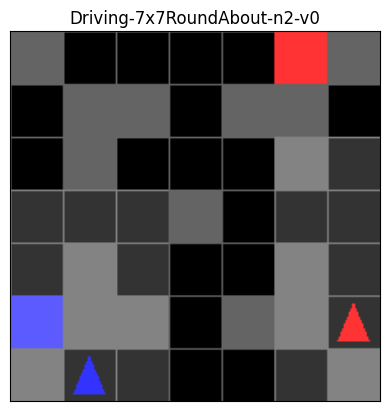

In [2]:
# change this
env_id = "Driving-7x7RoundAbout-n2-v0"

assert env_id in RESULTS_FILES

# display environment
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_xticklabels([])
ax.set_yticklabels([])

env = posggym.make(env_id, render_mode="rgb_array")
env.reset()
env_img = env.render()

imshow_obj = ax.imshow(env_img, interpolation='bilinear', origin='upper')
imshow_obj.set_data(env_img)

ax.set_title(env_id)
plt.show()

## Data Loading

In [3]:
df = plot_utils.import_results(RESULTS_FILES[env_id])

for k in ["agent_id", "policy_seed", "policy_type", "coplayer_policy_seed", "coplayer_policy_type"]:
    values = all_df[k].unique().tolist()
    values.sort()
    print(f"{k}: {values}")

policy_ids = df["policy_id"].unique().tolist()
policy_ids.sort()
print("\nPolicy IDs")
print("----------")
for pi_id in policy_ids:
    print(pi_id)
    
print("\nColumns")
print("-------")
for c in df.columns:
    print(c)

Policy IDs
----------
klr_k0_seed0-v0
klr_k0_seed1-v0
klr_k0_seed2-v0
klr_k0_seed3-v0
klr_k0_seed4-v0
klr_k1_seed0-v0
klr_k1_seed1-v0
klr_k1_seed2-v0
klr_k1_seed3-v0
klr_k1_seed4-v0
klr_k2_seed0-v0
klr_k2_seed1-v0
klr_k2_seed2-v0
klr_k2_seed3-v0
klr_k2_seed4-v0
klr_k3_seed0-v0
klr_k3_seed1-v0
klr_k3_seed2-v0
klr_k3_seed3-v0
klr_k3_seed4-v0
klr_k4_seed0-v0
klr_k4_seed1-v0
klr_k4_seed2-v0
klr_k4_seed3-v0
klr_k4_seed4-v0
klrbr_k4_seed0-v0
klrbr_k4_seed1-v0
klrbr_k4_seed2-v0
klrbr_k4_seed3-v0
klrbr_k4_seed4-v0
uniform_random-v0

Columns
-------
exp_id
agent_id
env_id
policy_id
exp_seed
num_episodes
episode_return_mean
episode_return_std
episode_return_max
episode_return_min
episode_steps_mean
episode_steps_std
episode_time_mean
episode_time_std
num_episode_done
num_LOSS
num_DRAW
num_WIN
num_NA
episode_return_CI
episode_steps_CI
episode_time_CI
prop_LOSS
prop_DRAW
prop_WIN
prop_NA
policy_seed
coplayer_policy_id


## Pairwise Performance

Here we look at the performance for each possible pairing of policies.

For each performance metric we have a grid of (grid)-plots:
    
- Outer-grid: train seed X train seed
- Inner-grid: policy_id X policy_id

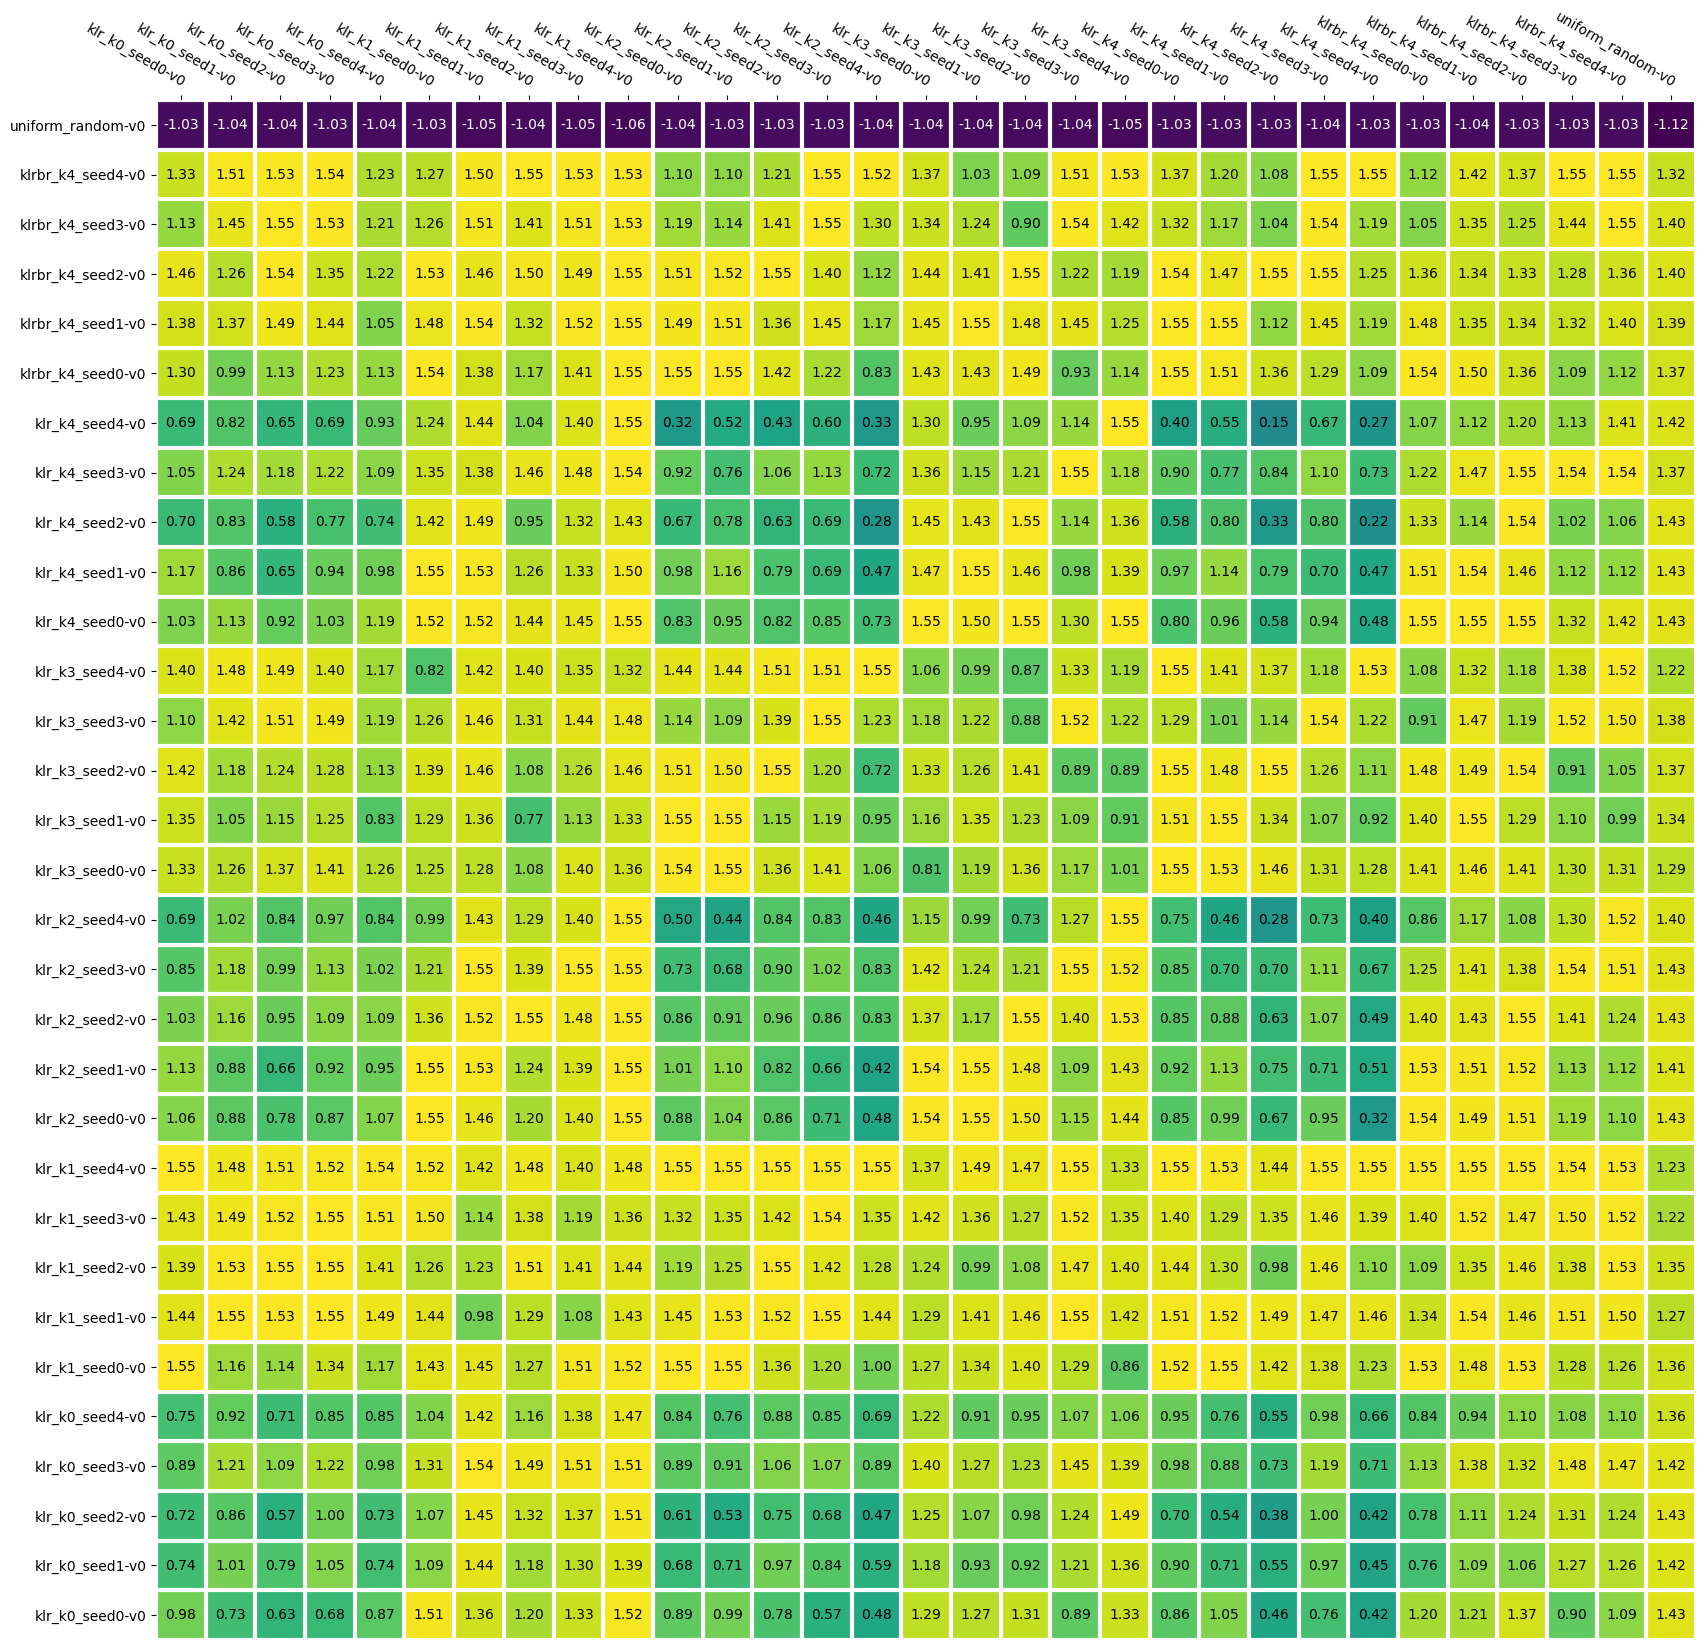

In [4]:
plot_utils.plot_pairwise_comparison(
    df, 
    y_key="episode_return_mean", 
    policy_key="policy_id",
    vrange=None, 
    figsize=(20, 20), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)

In [5]:
plot_utils.plot_pairwise_population_comparison(
    df, 
    y_key="episode_return_mean", 
    pop_key="policy_seed",
    policy_key="policy_id",
    coplayer_pop_key="policy_seed",
    coplayer_policy_key="coplayer_policy_id",
    vrange=None, 
    figsize=(20, 20), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)

/home/jonathon/code/posggym-agents/posggym_agents/plot/heatmap.py:156: RuntimeWarning: All-NaN slice encountered
  vrange = (np.nanmin(values), np.nanmax(values))
<__array_function__ internals>:200: UserWarning: Warning: converting a masked element to nan.
/home/jonathon/miniconda3/envs/posggym-agents3.8-2.0/lib/python3.8/site-packages/matplotlib/colors.py:1310: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/home/jonathon/miniconda3/envs/posggym-agents3.8-2.0/lib/python3.8/site-packages/matplotlib/ticker.py:389: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  return self.fmt.format(x=x, pos=pos)
/home/jonathon/miniconda3/envs/posggym-agents3.8-2.0/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57: DeprecationWarning: Passing `np.nan` to mean no clipping in np.clip has always been unreliable, and is now deprecated. In future, this will always return nan, like it alre

Error in callback <function flush_figures at 0x7f57ddba1f70> (for post_execute):


KeyboardInterrupt: 

### RL average policy performance

Here we look at average performance of the policies learned using RL by themselves.

Each plot shows the *mean performance* for the *row* policy against the *column* policy.

The **left-hand plot** shows *same-play* performance. So performance of policies against policies from the same training population. With the values shown being the mean over all populations.

The **middle plot** shows *cross-play* performance. So performance of policies against policies from different training populations. With the values shown being the mean over all populations.

The **right-hand plot** shows the generalization gap which is just the difference between the *Same-Play* and *Cross-Play* performance.

In [7]:
plot_utils.plot_mean_pairwise_comparison(
    all_df, 
    y_key="episode_return_mean", 
    policy_key="policy_type",
    pop_key="policy_seed",
    coplayer_pop_key="coplayer_policy_seed",
    coplayer_policy_key="coplayer_policy_type",
    vrange=None, 
    figsize=None, 
    valfmt="{x:.2f}"
)
plt.show()

/home/jonathon/code/posggym-agents/posggym_agents/plot/pairwise.py:251: RuntimeWarning: Mean of empty slice
  xp_pw_returns[row_policy_idx][col_policy_idx] = np.nanmean(xp_values)
/home/jonathon/code/posggym-agents/posggym_agents/plot/pairwise.py:250: RuntimeWarning: Mean of empty slice
  sp_pw_returns[row_policy_idx][col_policy_idx] = np.nanmean(sp_values)


KeyboardInterrupt: 

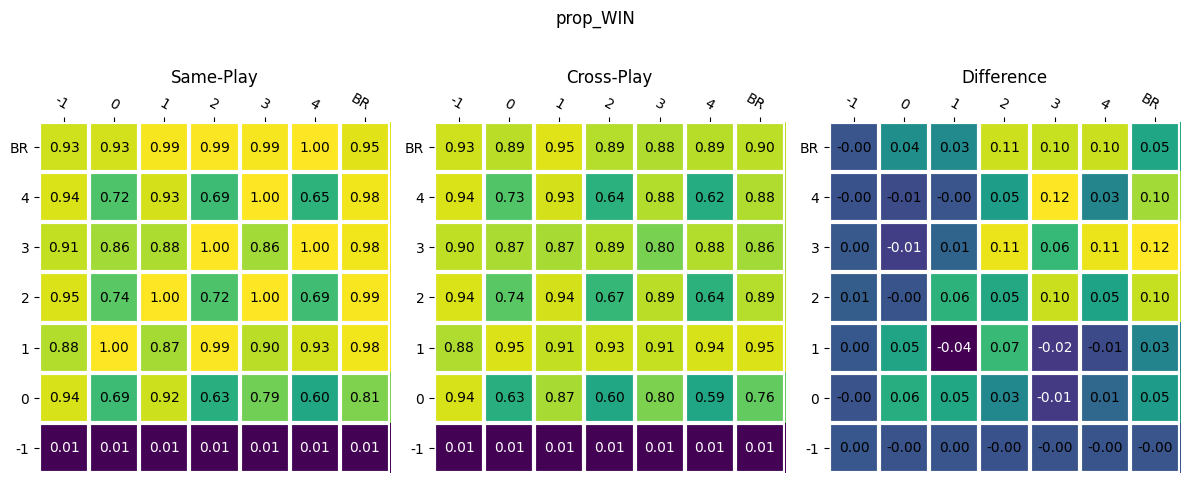

In [8]:
plot_utils.plot_mean_pairwise_comparison(
    all_df, 
    y_key="prop_WIN", 
    policy_key="policy_type",
    pop_key="policy_seed",
    coplayer_pop_key="coplayer_policy_seed",
    coplayer_policy_key="coplayer_policy_type",
    vrange=(0, 1.0), 
    figsize=None, 
    valfmt="{x:.2f}"
)
plt.show()

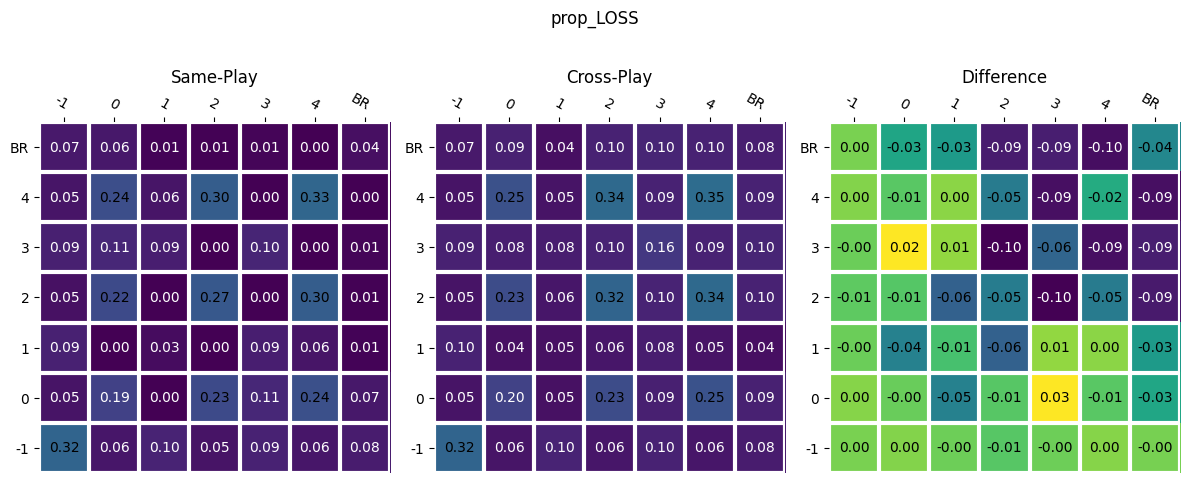

In [9]:
plot_utils.plot_mean_pairwise_comparison(
    klr_df, 
    y_key="prop_LOSS", 
    policy_key="K",
    pop_key="policy_seed",
    vrange=(0.0, 1.0)
)
plt.show()